# **Libraries**

In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalMaxPooling2D, Activation
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from numpy import expand_dims
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve
from datetime import datetime
import pytz

# **Data** **Preprocessing**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of images and dimension of each image of the train set: (60000, 28, 28)
Number of labels in the train set: (60000,)
Number of images and dimension of each image of the test set: (10000, 28, 28)
Number of labels in the test set: (10000,)
Matrix representation of first image in the train set: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18

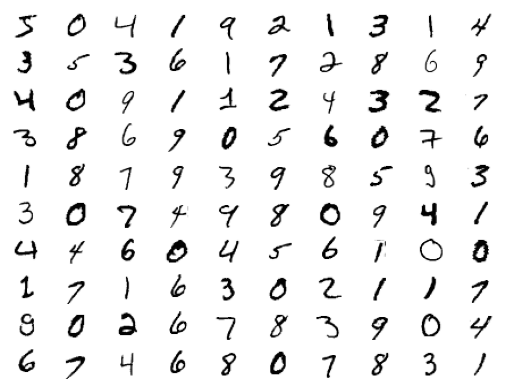

Images of digits belonging to different classes:


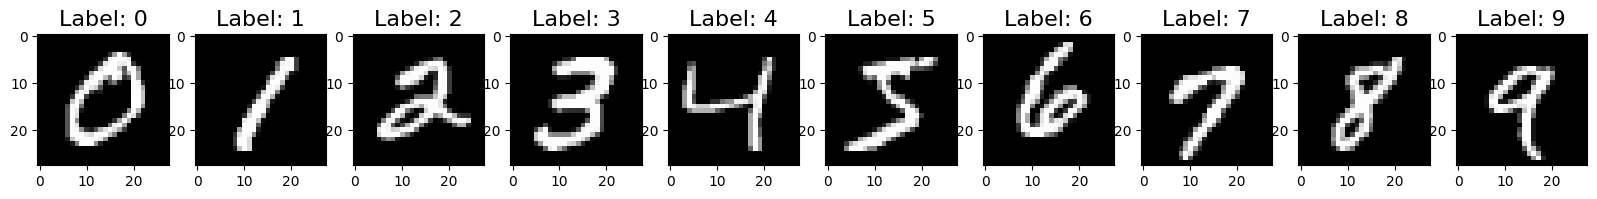

In [2]:
# Function which loads, visualizes and preprocesses MNIST dataset
def load_and_preprocess_data():

    # Loading the MNIST dataset which is already divided into train and test sets
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Printing the number of images in the train and test sets and their dimensions
    print("Number of images and dimension of each image of the train set:", X_train.shape) # Training set - 60,000 images of 28*28 dimension
    print("Number of labels in the train set:", y_train.shape) # Training set labels - 60,000
    print("Number of images and dimension of each image of the test set:", X_test.shape)  # Test set - 10,000 images of 28*28 dimension
    print("Number of labels in the test set:", y_test.shape)  # Test set labels - 10,000

    print("Matrix representation of first image in the train set:", X_train[0]) # Printing 1st image of the training set

    print("Label of the first image in the train set:", y_train[0]) # Printing 1st label of the training set

    # Visualize the first 100 images from the dataset
    for i in range(100):
        ax = plt.subplot(10, 10, i+1)
        ax.axis('off')
        plt.imshow(X_train[i], cmap='Greys')
    print("First 100 images from the training set:")
    plt.show()

    # Plotting images from each class of the train set
    num_of_classes = 10 # Total number of classes from 0-9
    f, ax = plt.subplots(1, num_of_classes, figsize=(20,20)) # Creating a figure with 1 row and columns and an array of axes for plotting

    for i in range(0, num_of_classes):
      img = X_train[y_train == i][0] # Filtering the X_train array to find the first image with a label equal to the current class i
      ax[i].imshow(img, cmap='gray') # Displaying the image in the i-th subplot of the figure
      ax[i].set_title("Label: {}".format(i), fontsize=16) # Setting the title of the subplot to the label
    print("Images of digits belonging to different classes:")
    plt.show()

    # Randomly splitting the training data into 90% training and 10% validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


    # Normalizing pixel values to the range [0, 1]
    X_train = X_train.astype('float32') / 255
    X_val = X_val.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    # Reshaping images to add the channel dimension (required for Conv2D)
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_val = X_val.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    # Converting class vectors to binary class matrix
    y_train = to_categorical(y_train, 10)
    y_val = to_categorical(y_val, 10)
    y_test = to_categorical(y_test, 10)

    return (X_train, X_val, y_train, y_val), (X_test, y_test)

(X_train, X_val, y_train, y_val), (X_test, y_test) = load_and_preprocess_data()

# **Functions to Test Models, Plot Accuracy and Loss Graphs and Calculate F1 and AUC Scores**

In [ ]:
# Function to test the models
def test_model(model, X_test, y_test, model_name):
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("Test accuracy of", model_name, ":", test_acc)

# Function to print Timestamp
def timestamp():
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))

# Function to plot training and validation accuracy and loss
def loss_and_accuracy_plots(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Function to calculate and print F1 and AUC score
def f1_auc_score(model, X_test):
    y_pred_prob = model.predict(X_test)  # Get predicted probabilities
    y_pred_class = np.argmax(model.predict(X_test), axis=-1)  # Convert probabilities to class labels
    y_test_class = np.argmax(y_test, axis=-1)  # Convert one-hot encoded labels to class labels

    f1 = f1_score(y_test_class, y_pred_class, average='weighted')
    auc = roc_auc_score(y_test_class, y_pred_prob, multi_class='ovr')

    print('F1 Score:', f1)
    print('AUC Score:', auc)

# **DNN Models**





In [ ]:
# dnn_model_128_LR1 Hyperparameters -
# 2 hidden layers (1 flatten layer and 1 fully connected layer with 128 neurons) and output layer with 10 neurons for classification
# Optimizer - Adam, Learning Rate (LR1) - 0.1, epochs - 8, batch size = 32 (default)
def dnn_model_128_LR1():
    model_name = "dnn_model_128_LR1"
    model = Sequential([Input(shape=(28, 28, 1)), Flatten(), Dense(128, activation='relu'), Dense(10, activation='softmax')])
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.1),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val))

    return model, history, model_name

# dnn_model_128_LR2 Hyperparameters -
# 2 hidden layers (1 flatten layer and 1 fully connected layer with 128 neurons) and output layer with 10 neurons for classification
# Optimizer - Adam, Learning Rate (LR2) - 0.01, epochs - 8, batch size = 32 (default)
def dnn_model_128_LR2():
    model_name = "dnn_model_128_LR2"
    model = Sequential([Input(shape=(28, 28, 1)), Flatten(), Dense(128, activation='relu'), Dense(10, activation='softmax')])
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val))

    return model, history, model_name

# dnn_model_128_LR3 Hyperparameters -
# 2 hidden layers (1 flatten layer and 1 fully connected layer with 128 neurons) and output layer with 10 neurons for classification
# Optimizer - Adam, Learning Rate (LR3) - 0.001, epochs - 8, batch size = 32 (default)
def dnn_model_128_LR3():
    model_name = "dnn_model_128_LR3"
    model = Sequential([Input(shape=(28, 28, 1)), Flatten(), Dense(128, activation='relu'), Dense(10, activation='softmax')])
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val))

    return model, history, model_name

# dnn_model_256_128_LR1 Hyperparameters -
# 3 hidden layers (1 flatten layer and 2 fully connected layers with 256 and 128 neurons respectively) and output layer with 10 neurons for classification
# Optimizer - Adam, Learning Rate (LR1) - 0.1, epochs - 15, batch size = 128
def dnn_model_256_128_LR1():
    model_name = "dnn_model_256_128_LR1"
    model = Sequential([Input(shape=(28, 28, 1)), Flatten(), Dense(256, activation='relu'), Dense(128, activation='relu'), Dense(10, activation='softmax')])
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.1),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# dnn_model_256_128_LR2 Hyperparameters -
# 3 hidden layers (1 flatten layer and 2 fully connected layers with 256 and 128 neurons respectively) and output layer with 10 neurons for classification
# Optimizer - Adam, Learning Rate (LR2) - 0.01, epochs - 15, batch size = 128
def dnn_model_256_128_LR2():
    model_name = "dnn_model_256_128_LR2"
    model = Sequential([Input(shape=(28, 28, 1)), Flatten(), Dense(256, activation='relu'), Dense(128, activation='relu'), Dense(10, activation='softmax')])
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# dnn_model_256_128_LR3 Hyperparameters -
# 3 hidden layers (1 flatten layer and 2 fully connected layers with 256 and 128 neurons respectively) and output layer with 10 neurons for classification
# Optimizer - Adam, Learning Rate (LR3) - 0.001, epochs - 15, batch size = 128
def dnn_model_256_128_LR3():
    model_name = "dnn_model_256_128_LR3"
    model = Sequential([Input(shape=(28, 28, 1)), Flatten(), Dense(256, activation='relu'), Dense(128, activation='relu'), Dense(10, activation='softmax')])
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# dnn_model_2048 Hyperparameters -
# 2 hidden layers (1 flatten layer and 1 fully connected layers with 2048 neurons and output layer with 10 neurons for classification
# Optimizer - Adam, Learning Rate (LR3) - 0.001, epochs - 15, batch size = 128
def dnn_model_2048():
    model_name = "dnn_model_2048"
    model = Sequential([Input(shape=(28, 28, 1)), Flatten(), Dense(2048, activation='relu'), Dense(10, activation='softmax')])
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# dnn_model_512_512 Hyperparameters -
# 3 hidden layers (1 flatten layer and 2 fully connected layers with 512 and 512 neurons respectively) and output layer with 10 neurons for classification
# Optimizer - Adam, Learning Rate (LR2) - 0.001, epochs - 15, batch size = 128
def dnn_model_512_512():
    model_name = "dnn_model_512_512"
    model = Sequential([Input(shape=(28, 28, 1)), Flatten(), Dense(512, activation='relu'), Dense(512, activation='relu'), Dense(10, activation='softmax')])
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name


# **DNN Models Training and Test**

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_37 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4645 - loss: 1.7598 - val_accuracy: 0.3762 - val_loss: 1.6083
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4116 - loss: 1.4972 - val_accuracy: 0.4098 - val_loss: 1.4765
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3916 - loss: 1.5739 - val_accuracy: 0.3522 - val_loss: 1.5524
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4098 - loss: 1.5276 - val_accuracy: 0.3992 - val_loss: 1.6169
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3941 - loss: 1.5666 - val_accuracy: 0.4018 - val_loss: 1.8206
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3849 - loss: 1.6120 - val_accuracy: 0.3365 - val_loss: 1.8019
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3742 - loss: 1.6170 - val_accuracy: 0.3852 - val_loss: 1.6287
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3984 - loss: 1.5985 - val_accu

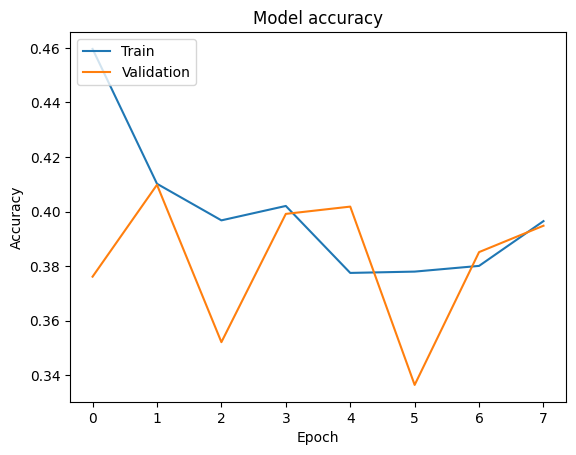

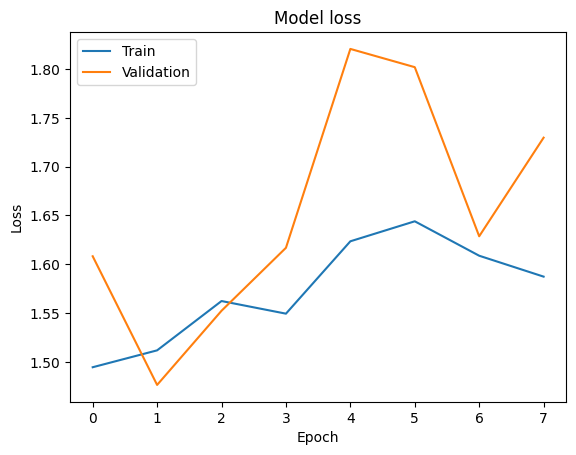

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score: 0.3442519013217756
AUC Score: 0.8103258226314616
------------------------------------------------------


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_38 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8906 - loss: 0.3600 - val_accuracy: 0.9468 - val_loss: 0.1932
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9576 - loss: 0.1546 - val_accuracy: 0.9573 - val_loss: 0.1523
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9633 - loss: 0.1335 - val_accuracy: 0.9548 - val_loss: 0.1667
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9637 - loss: 0.1282 - val_accuracy: 0.9575 - val_loss: 0.1745
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9686 - loss: 0.1142 - val_accuracy: 0.9650 - val_loss: 0.1634
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9713 - loss: 0.1070 - val_accuracy: 0.9602 - val_loss: 0.1900
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9737 - loss: 0.0998 - val_accuracy: 0.9627 - val_loss: 0.2003
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9744 - loss: 0.0984 - val_acc

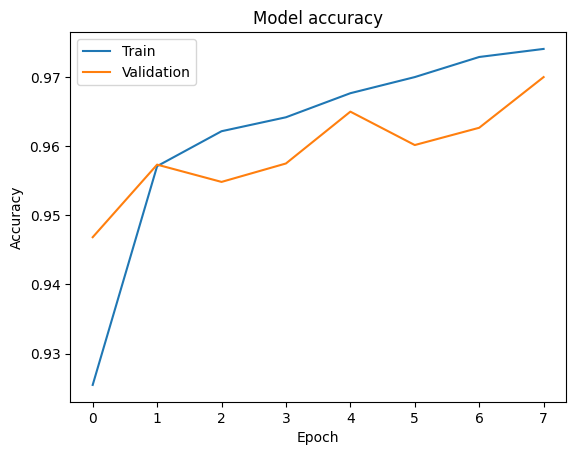

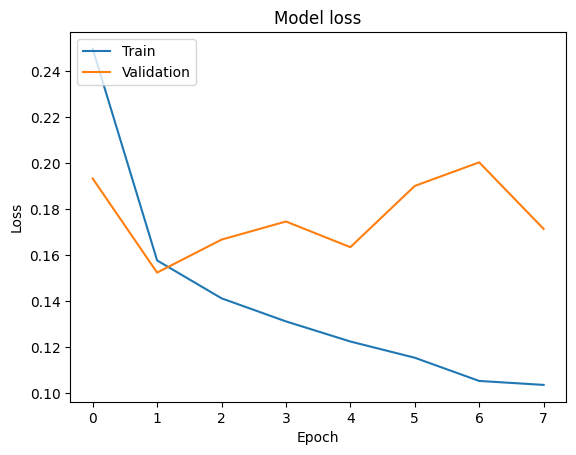

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score: 0.9660177496308928
AUC Score: 0.9983342293742771
------------------------------------------------------


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_39 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8691 - loss: 0.4610 - val_accuracy: 0.9510 - val_loss: 0.1662
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9635 - loss: 0.1248 - val_accuracy: 0.9700 - val_loss: 0.1027
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9761 - loss: 0.0825 - val_accuracy: 0.9713 - val_loss: 0.1011
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.0602 - val_accuracy: 0.9767 - val_loss: 0.0839
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0476 - val_accuracy: 0.9790 - val_loss: 0.0733
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9900 - loss: 0.0345 - val_accuracy: 0.9787 - val_loss: 0.0756
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9910 - loss: 0.0305 - val_accuracy: 0.9775 - val_loss: 0.0842
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9933 - loss: 0.0225 - val_acc

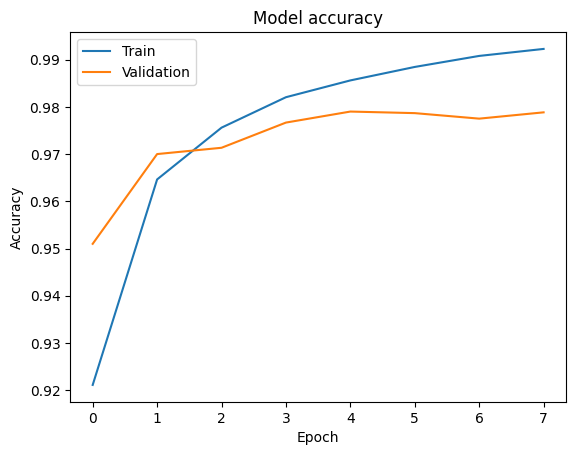

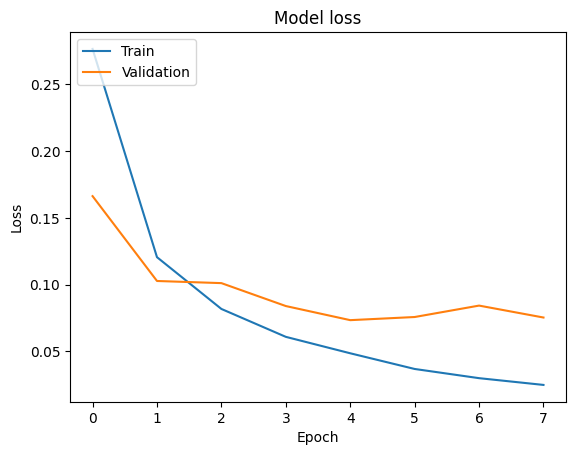

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.977891463985419
AUC Score: 0.9996876207787061
------------------------------------------------------


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_40 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3199 - loss: 4.4898 - val_accuracy: 0.3600 - val_loss: 1.5236
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3484 - loss: 1.5396 - val_accuracy: 0.3768 - val_loss: 1.5160
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3602 - loss: 1.5322 - val_accuracy: 0.3597 - val_loss: 1.4883
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3582 - loss: 1.5400 - val_accuracy: 0.3472 - val_loss: 1.5744
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3679 - loss: 1.5463 - val_accuracy: 0.3700 - val_loss: 1.5494
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3492 - loss: 1.5388 - val_accuracy: 0.3628 - val_loss: 1.4999
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3550 - loss: 1.5396 - val_accuracy: 0.3442 - val_loss: 1.6066
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3641 - loss: 1.5151 - val_accuracy: 0

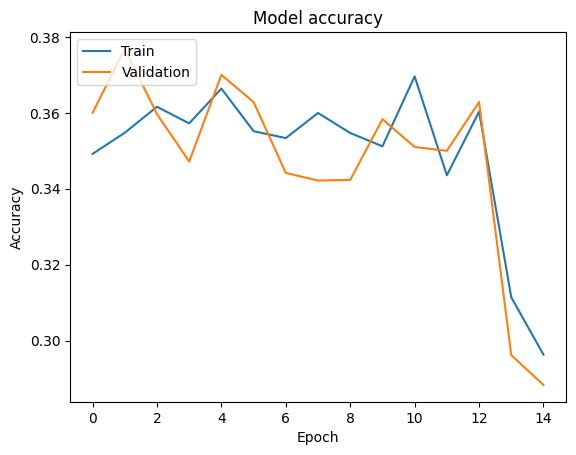

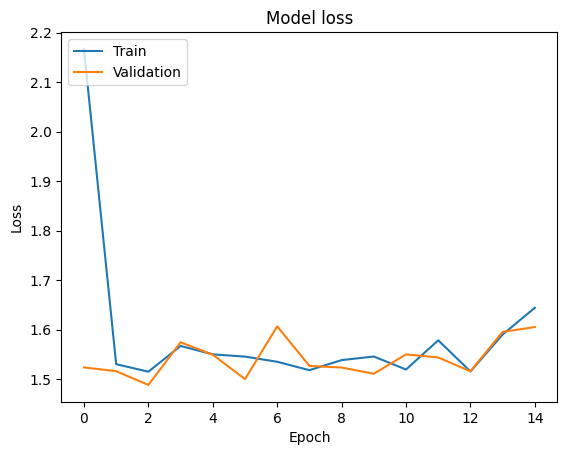

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.18058146168335826
AUC Score: 0.7793720789128352
------------------------------------------------------


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_41 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8504 - loss: 0.5254 - val_accuracy: 0.9605 - val_loss: 0.1335
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9665 - loss: 0.1132 - val_accuracy: 0.9713 - val_loss: 0.1020
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9783 - loss: 0.0702 - val_accuracy: 0.9775 - val_loss: 0.0752
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9842 - loss: 0.0508 - val_accuracy: 0.9810 - val_loss: 0.0657
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9892 - loss: 0.0343 - val_accuracy: 0.9775 - val_loss: 0.0787
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9906 - loss: 0.0296 - val_accuracy: 0.9817 - val_loss: 0.0691
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9927 - loss: 0.0232 - val_accuracy: 0.9833 - val_loss: 0.0614
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 

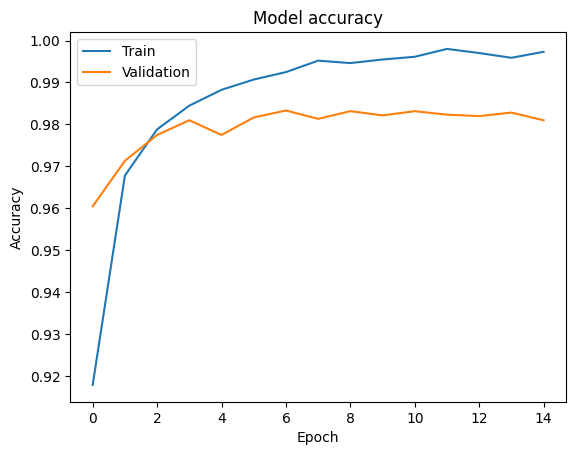

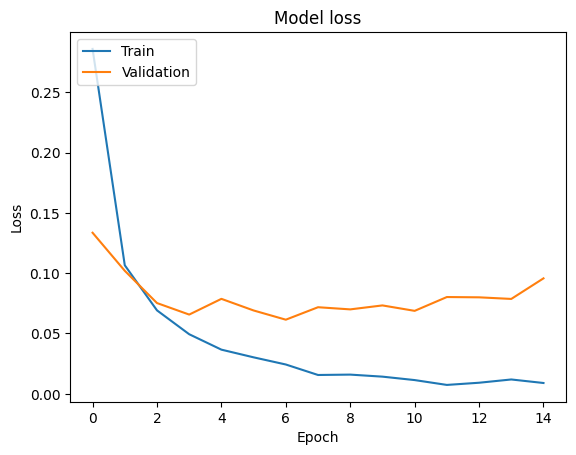

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.9778202411376288
AUC Score: 0.9996641744086869
------------------------------------------------------


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_42 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8473 - loss: 0.5388 - val_accuracy: 0.9627 - val_loss: 0.1312
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9664 - loss: 0.1145 - val_accuracy: 0.9708 - val_loss: 0.0961
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9777 - loss: 0.0733 - val_accuracy: 0.9753 - val_loss: 0.0779
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9844 - loss: 0.0523 - val_accuracy: 0.9783 - val_loss: 0.0748
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9890 - loss: 0.0370 - val_accuracy: 0.9803 - val_loss: 0.0657
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9928 - loss: 0.0257 - val_accuracy: 0.9793 - val_loss: 0.0726
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9940 - loss: 0.0202 - val_accuracy: 0.9782 - val_loss: 0.0742
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9935 - loss: 0.0189 - val_accuracy: 0

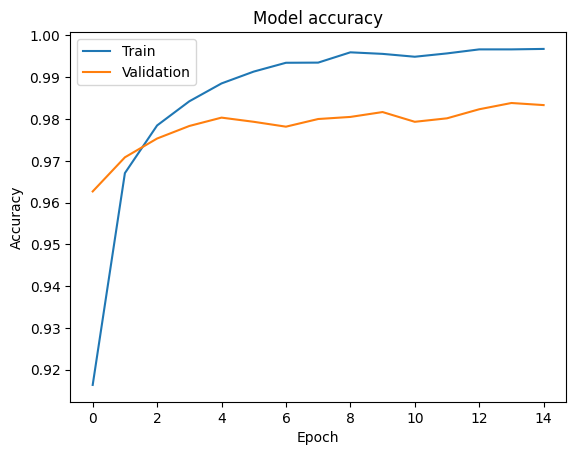

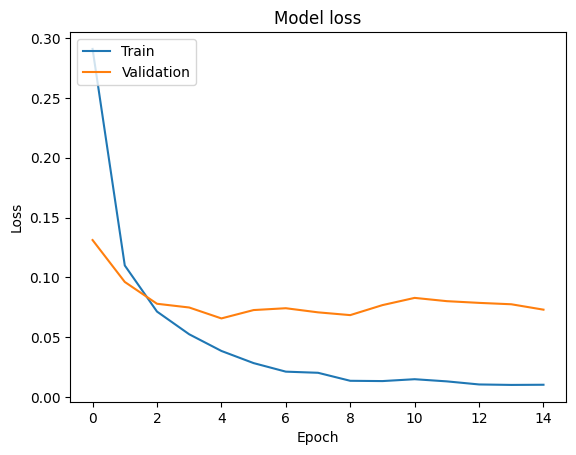

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.9811004155546403
AUC Score: 0.9997231107131821
------------------------------------------------------


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_43 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 2048)                │       1,607,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,628,170 (6.21 MB)

 Trainable params: 1,628,170 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.8795 - loss: 0.3985 - val_accuracy: 0.9677 - val_loss: 0.1115
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9738 - loss: 0.0891 - val_accuracy: 0.9788 - val_loss: 0.0741
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9848 - loss: 0.0518 - val_accuracy: 0.9833 - val_loss: 0.0606
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9890 - loss: 0.0355 - val_accuracy: 0.9810 - val_loss: 0.0668
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9936 - loss: 0.0222 - val_accuracy: 0.9837 - val_loss: 0.0569
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9955 - loss: 0.0159 - val_accuracy: 0.9820 - val_loss: 0.0651
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9966 - loss: 0.0116 - val_accuracy: 0.9822 - val_loss: 0.0640
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9975 - loss: 0.0090 - 

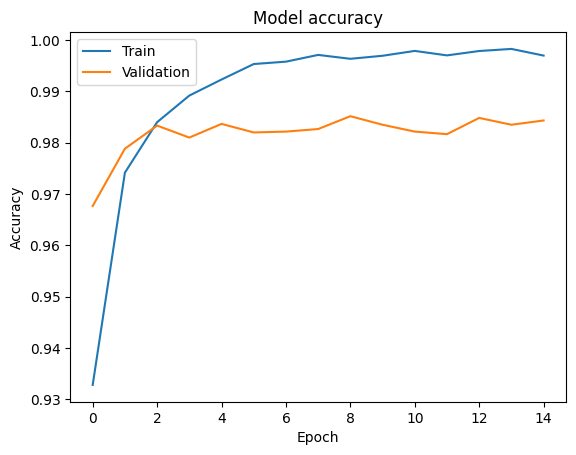

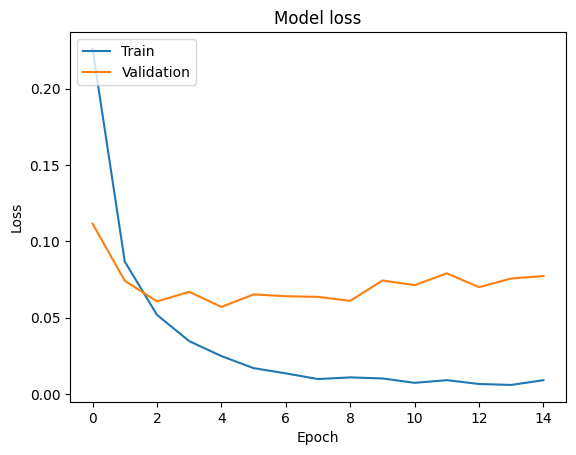

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
F1 Score: 0.9839004002795099
AUC Score: 0.9997793892852578
------------------------------------------------------


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_44 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8794 - loss: 0.4173 - val_accuracy: 0.9633 - val_loss: 0.1190
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9748 - loss: 0.0814 - val_accuracy: 0.9747 - val_loss: 0.0814
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9832 - loss: 0.0516 - val_accuracy: 0.9782 - val_loss: 0.0744
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9892 - loss: 0.0342 - val_accuracy: 0.9785 - val_loss: 0.0693
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9926 - loss: 0.0238 - val_accuracy: 0.9808 - val_loss: 0.0638
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9943 - loss: 0.0169 - val_accuracy: 0.9787 - val_loss: 0.0789
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9949 - loss: 0.0159 - val_accuracy: 0.9817 - val_loss: 0.0708
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9957 - loss: 0.0126 - val_a

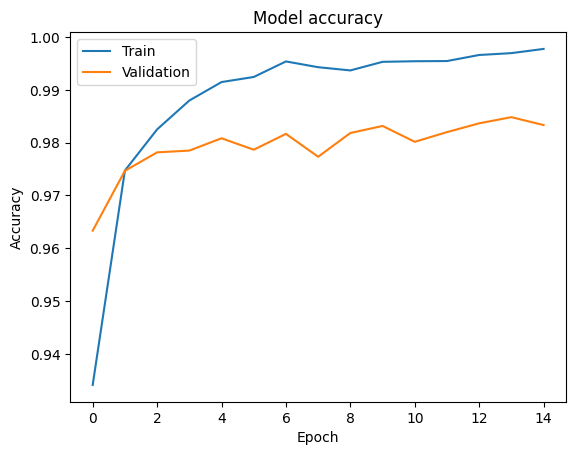

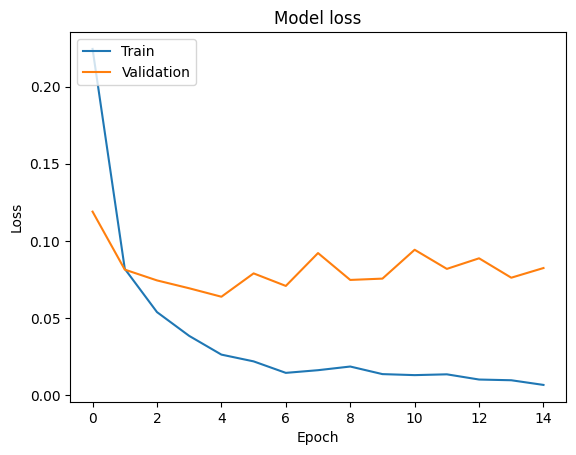

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
F1 Score: 0.9818070119920276
AUC Score: 0.999730748216094
------------------------------------------------------


In [ ]:
# Array with all the DNN models
list_of_dnn_models = [dnn_model_128_LR1, dnn_model_128_LR2, dnn_model_128_LR3, dnn_model_256_128_LR1, dnn_model_256_128_LR2, dnn_model_256_128_LR3, dnn_model_2048, dnn_model_512_512]

for m in list_of_dnn_models:
  model, history, model_name = m()
  test_model(model, X_test, y_test, model_name)
  timestamp()
  loss_and_accuracy_plots(history)
  f1_auc_score(model, X_test)
  print("------------------------------------------------------")

# **CNN Models**

In [ ]:
# cnn_model_32_64_LR1 Hyperparameters -
# Conv Layer 1 - (32, (3,3)), Activation - relu, MaxPooling Layer,
# Conv Layer 2 - (64, (3,3)), Activation - relu, MaxPooling Layer, Flatten Layer, Dense Layer (128 neurons), Activation - relu, Output Layer (10 neurons)
# Adam Optimizer, Learning Rate (LR1) - 0.1, epochs - 10, Batch Size - 128
def cnn_model_32_64_LR1():
    model_name = "cnn_model_32_64_LR1"
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu')) # Conv Layer 1 - 32 feature maps, 3*3 kernel size, activation - relu
    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 1 - 2*2 pool size
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), activation='relu')) # Conv Layer 2 - 64 feature maps, 3*3 kernel size, activation - relu
    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 2 - 2*2 pool size
    model.add(Flatten()) # Flatten Layer
    model.add(Dense(units=128, activation='relu')) # Dense Layer 1 - 128 neurons
    model.add(Dense(units=10, activation='softmax')) # Output Layer - 10 neurons
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.1),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# cnn_model_32_64_LR2 Hyperparameters -
# Conv Layer 1 - (32, (3,3)), Activation - relu, MaxPooling Layer,
# Conv Layer 2 - (64, (3,3)), Activation - relu, MaxPooling Layer, Flatten Layer, Dense Layer (128 neurons), Activation - relu, Output Layer (10 neurons)
# Adam Optimizer, Learning Rate (LR2) - 0.01, epochs - 10, Batch Size - 128
def cnn_model_32_64_LR2():
    model_name = "cnn_model_32_64_LR2"
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu')) # Conv Layer 1 - 32 feature maps, 3*3 kernel size, activation - relu
    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 1 - 2*2 pool size
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), activation='relu')) # Conv Layer 2 - 64 feature maps, 3*3 kernel size, activation - relu
    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 2 - 2*2 pool size
    model.add(Flatten()) # Flatten Layer
    model.add(Dense(units=128, activation='relu')) # Dense Layer 1 - 128 neurons
    model.add(Dense(units=10, activation='softmax')) # Output Layer - 10 neurons
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# cnn_model_32_64_LR3 Hyperparameters -
# Conv Layer 1 - (32, (3,3)), Activation - relu, MaxPooling Layer,
# Conv Layer 2 - (64, (3,3)), Activation - relu, MaxPooling Layer, Flatten Layer, Dense Layer (128 neurons), Activation - relu, Output Layer (10 neurons)
# Adam Optimizer, Learning Rate (LR3) - 0.001, epochs - 10, Batch Size - 128
def cnn_model_32_64_LR3():
    model_name = "cnn_model_32_64_LR3"
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu')) # Conv Layer 1 - 32 feature maps, 3*3 kernel size, activation - relu
    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 1 - 2*2 pool size
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), activation='relu')) # Conv Layer 2 - 64 feature maps, 3*3 kernel size, activation - relu
    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 2 - 2*2 pool size
    model.add(Flatten()) # Flatten Layer
    model.add(Dense(units=128, activation='relu')) # Dense Layer 1 - 128 neurons
    model.add(Dense(units=10, activation='softmax')) # Output Layer - 10 neurons
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# cnn_model_12_24_32 Hyperparameters -
# Conv Layer 1 - (12, (3,3)), BatchNormalization, Activation - relu,
# Conv Layer 2 - (24, (3,3), stride=(2,2)), BatchNormalization, Activation - relu,
# Conv Layer 3 - (32, (3,3), stride=(2,2)), BatchNormalization, Activation - relu,
# Flatten Layer, Dense Layer (200 neurons), BatchNormalization, Activation - relu,
# Dropout Layer, Output Layer (10 neurons)
# Adam Optimizer, Learning Rate - 0.001, epochs - 10, Batch Size - 128
def cnn_model_12_24_32():
    model_name = "cnn_model_12_24_32"
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))

    model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 1 - 12 feature maps, 3*3 kernel size, stride - 1, activation - relu
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=24, kernel_size=(6, 6), strides=(2,2), padding='same')) # Conv Layer 2 - 24 feature maps, 6*6 kernel size, stride - 2, activation - relu
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=32, kernel_size=(6, 6), strides=(2,2), padding='same')) # Conv Layer 3 - 32 feature maps, 6*6 kernel size, stride - 2, activation - relu
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Flatten())

    model.add(Dense(units=200)) # Dense Layer 1 - 200 neurons
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.4))
    model.add(Dense(units=10, activation='softmax')) # Output Layer - 10 neurons
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# **CNN Models Training and Test**

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 110ms/step - accuracy: 0.1056 - loss: 12.8264 - val_accuracy: 0.1053 - val_loss: 2.3037
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.1026 - loss: 2.3075 - val_accuracy: 0.1055 - val_loss: 2.3111
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 114ms/step - accuracy: 0.1066 - loss: 2.3073 - val_accuracy: 0.0967 - val_loss: 2.3064
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 113ms/step - accuracy: 0.1021 - loss: 2.3074 - val_accuracy: 0.1090 - val_loss: 2.3034
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.1048 - loss: 2.3068 - val_accuracy: 0.1055 - val_loss: 2.3060
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 86s 123ms/step - accuracy: 0.1087 - loss: 2.3070 - val_accuracy: 0.1090 - val_loss: 2.3065
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 0.1032 - loss: 2.3075 - val_accuracy: 0.1090 - val_loss: 2.3073
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 110ms/step - accuracy: 0.1049 - loss: 

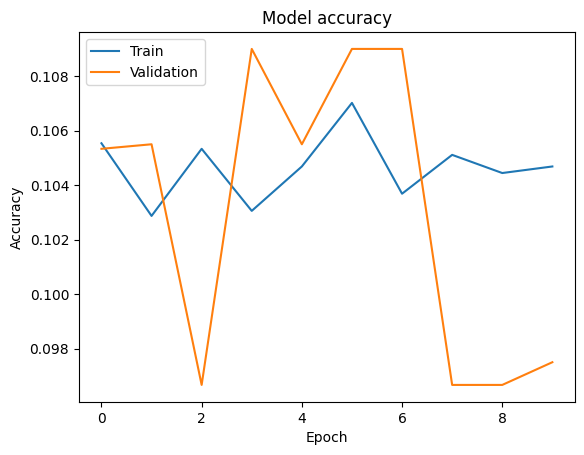

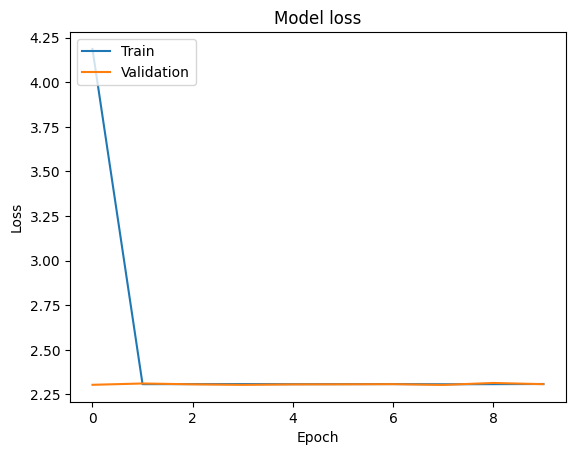

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
F1 Score: 0.017289520685256063
AUC Score: 0.5


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 117ms/step - accuracy: 0.8860 - loss: 0.3564 - val_accuracy: 0.9850 - val_loss: 0.0517
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.9836 - loss: 0.0532 - val_accuracy: 0.9852 - val_loss: 0.0556
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.9875 - loss: 0.0413 - val_accuracy: 0.9852 - val_loss: 0.0530
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - accuracy: 0.9904 - loss: 0.0316 - val_accuracy: 0.9830 - val_loss: 0.0624
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 123ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9850 - val_loss: 0.0546
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 76s 109ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9873 - val_loss: 0.0603
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 0.9920 - loss: 0.0283 - val_accuracy: 0.9830 - val_loss: 0.0823
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 116ms/step - accuracy: 0.9910 - loss: 0

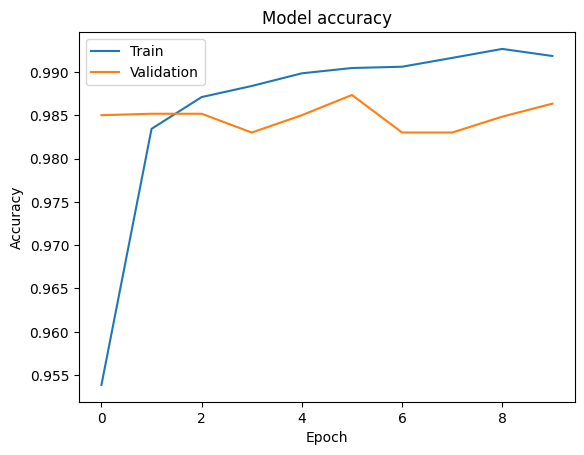

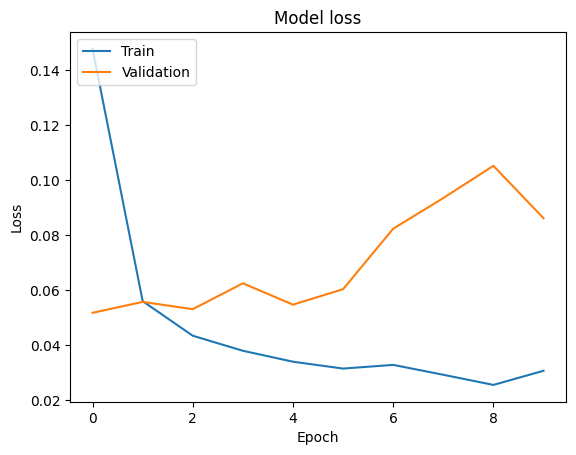

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
F1 Score: 0.986199890344517
AUC Score: 0.999814504223772


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 121ms/step - accuracy: 0.8499 - loss: 0.5295 - val_accuracy: 0.9765 - val_loss: 0.0768
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 112ms/step - accuracy: 0.9804 - loss: 0.0653 - val_accuracy: 0.9847 - val_loss: 0.0519
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 120ms/step - accuracy: 0.9874 - loss: 0.0416 - val_accuracy: 0.9860 - val_loss: 0.0458
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 119ms/step - accuracy: 0.9894 - loss: 0.0344 - val_accuracy: 0.9885 - val_loss: 0.0373
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 118ms/step - accuracy: 0.9924 - loss: 0.0255 - val_accuracy: 0.9893 - val_loss: 0.0407
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 110ms/step - accuracy: 0.9939 - loss: 0.0197 - val_accuracy: 0.9913 - val_loss: 0.0305
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 111ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9902 - val_loss: 0.0353
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 86s 120ms/step - accuracy: 0.9957 - loss: 0

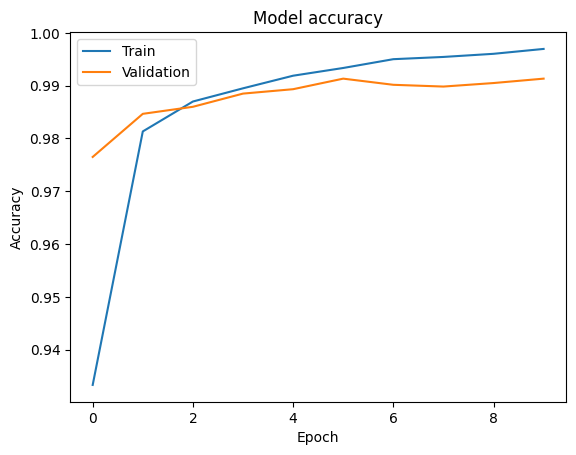

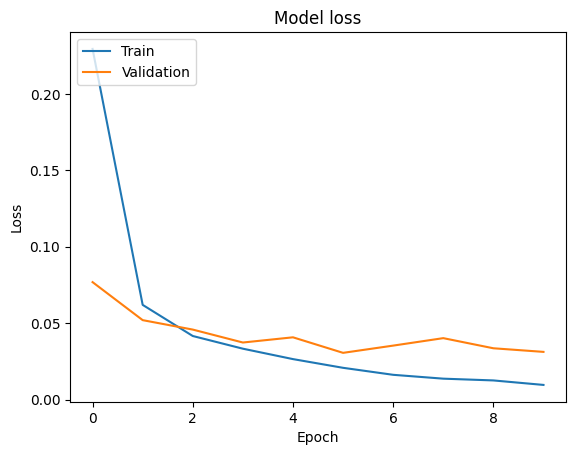

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
F1 Score: 0.9919977747927089
AUC Score: 0.9999312823511468


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 12)          │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 12)          │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 24)          │          10,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 14, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 7, 7, 32)            │          27,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 200)                 │         313,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,074 (1.35 MB)

 Trainable params: 354,538 (1.35 MB)

 Non-trainable params: 536 (2.09 KB)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 88s 199ms/step - accuracy: 0.8916 - loss: 0.3601 - val_accuracy: 0.9815 - val_loss: 0.0739
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 199ms/step - accuracy: 0.9838 - loss: 0.0540 - val_accuracy: 0.9883 - val_loss: 0.0413
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 196ms/step - accuracy: 0.9904 - loss: 0.0336 - val_accuracy: 0.9915 - val_loss: 0.0304
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 88s 208ms/step - accuracy: 0.9922 - loss: 0.0254 - val_accuracy: 0.9910 - val_loss: 0.0343
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 198ms/step - accuracy: 0.9933 - loss: 0.0219 - val_accuracy: 0.9885 - val_loss: 0.0403
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 145s 205ms/step - accuracy: 0.9945 - loss: 0.0175 - val_accuracy: 0.9895 - val_loss: 0.0376
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 200ms/step - accuracy: 0.9952 - loss: 0.0162 - val_accuracy: 0.9905 - val_loss: 0.0327
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 144s 204ms/step - accuracy: 0.9956 - loss

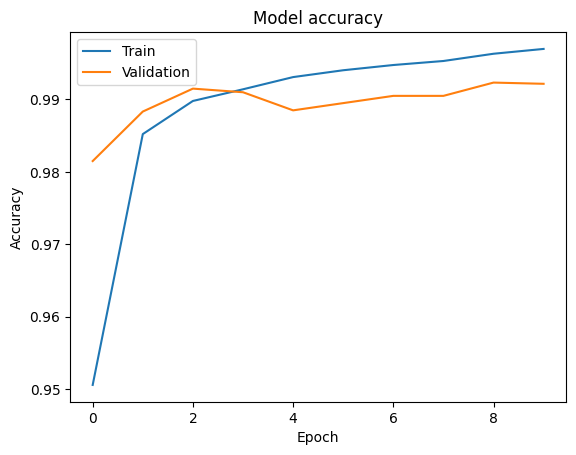

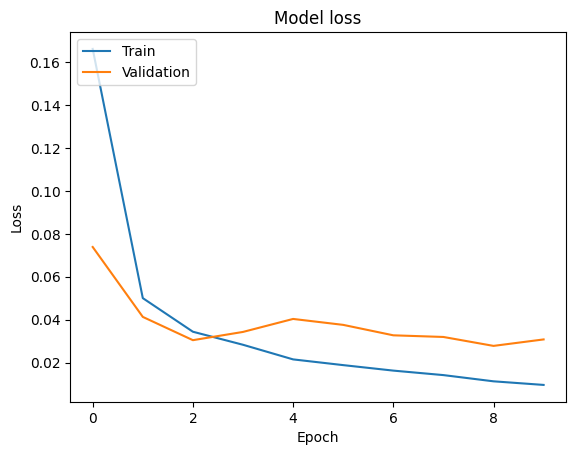

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
F1 Score: 0.9926931551680612
AUC Score: 0.999969178066425


In [ ]:
list_of_cnn_models = [cnn_model_32_64_LR1, cnn_model_32_64_LR2, cnn_model_32_64_LR3, cnn_model_12_24_32]

for m in list_of_cnn_models:
  model, history, model_name = m()
  test_model(model, X_test, y_test, model_name)
  timestamp()
  loss_and_accuracy_plots(history)
  f1_auc_score(model, X_test)

# **VGG Models**

In [ ]:
# vgg_13_model_LR1 Hyperparameters -
# Learning Rate (LR1) - 0.1
def vgg_13_model_LR1():
    model_name = "vgg_16_model_LR1"
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 1 - 64 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 2 - 64 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(1, 1))) # Max Pooling Layer 1 - 2*2 pool size

    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 3 - 128 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 4 - 128 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(1, 1))) # Max Pooling Layer 2 - 2*2 pool size

    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 5 - 256 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 6 - 256 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 3 - 2*2 pool size

    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 7 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 8 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 4 - 2*2 pool size

    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 9 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 10 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 5 - 2*2 pool size

    model.add(GlobalMaxPooling2D()) # Global Max Pooling Layer
    model.add(Dense(units=512, activation='relu')) # Dense Layer 1 - 512 neurons
    model.add(Dense(units=512, activation='relu')) # Output Layer - 512 neurons
    model.add(Dense(units=10, activation='softmax')) # Output Layer - 10 neurons
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.1),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# vgg_13_model_LR2 Hyperparameters -
# Learning Rate (LR2) - 0.01
def vgg_13_model_LR2():
    model_name = "vgg_16_model_LR2"
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 1 - 64 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 2 - 64 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(1, 1))) # Max Pooling Layer 1 - 2*2 pool size

    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 3 - 128 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 4 - 128 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(1, 1))) # Max Pooling Layer 2 - 2*2 pool size

    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 5 - 256 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 6 - 256 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 3 - 2*2 pool size

    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 7 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 8 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 4 - 2*2 pool size

    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 9 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 10 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 5 - 2*2 pool size

    model.add(GlobalMaxPooling2D()) # Global Max Pooling Layer
    model.add(Dense(units=512, activation='relu')) # Dense Layer 1 - 512 neurons
    model.add(Dense(units=512, activation='relu')) # Output Layer - 512 neurons
    model.add(Dense(units=10, activation='softmax')) # Output Layer - 10 neurons
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# vgg_13_model_LR3 Hyperparameters -
# Learning Rate (LR3) - 0.001
def vgg_13_model_LR3():
    model_name = "vgg_16_model_LR3"
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 1 - 64 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 2 - 64 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(1, 1))) # Max Pooling Layer 1 - 2*2 pool size

    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 3 - 128 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 4 - 128 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(1, 1))) # Max Pooling Layer 2 - 2*2 pool size

    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 5 - 256 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 6 - 256 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 3 - 2*2 pool size

    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 7 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 8 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 4 - 2*2 pool size

    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 9 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu
    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 10 - 512 feature maps, 3*3 kernel size
    model.add(Activation('relu')) # Activation - relu

    model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer 5 - 2*2 pool size

    model.add(GlobalMaxPooling2D()) # Global Max Pooling Layer
    model.add(Dense(units=512, activation='relu')) # Dense Layer 1 - 512 neurons
    model.add(Dense(units=512, activation='relu')) # Output Layer - 512 neurons
    model.add(Dense(units=10, activation='softmax')) # Output Layer - 10 neurons
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# **VGG Models Training and Test**

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,934,282 (37.90 MB)

 Trainable params: 9,934,282 (37.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 277ms/step - accuracy: 0.1024 - loss: 26698340892672.0000 - val_accuracy: 0.0975 - val_loss: 2.3045
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 86s 197ms/step - accuracy: 0.1057 - loss: 2.3030 - val_accuracy: 0.1090 - val_loss: 2.3044
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 197ms/step - accuracy: 0.1040 - loss: 2.3038 - val_accuracy: 0.1055 - val_loss: 2.3049
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.1081 - loss: 2.3040 - val_accuracy: 0.1090 - val_loss: 2.3043
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 197ms/step - accuracy: 0.1061 - loss: 2.3049 - val_accuracy: 0.0975 - val_loss: 2.3074
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 197ms/step - accuracy: 0.0999 - loss: 2.3060 - val_accuracy: 0.1090 - val_loss: 2.3097
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 198ms/step - accuracy: 0.1071 - loss: 2.3057 - val_accuracy: 0.1090 - val_loss: 2.3055
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accurac

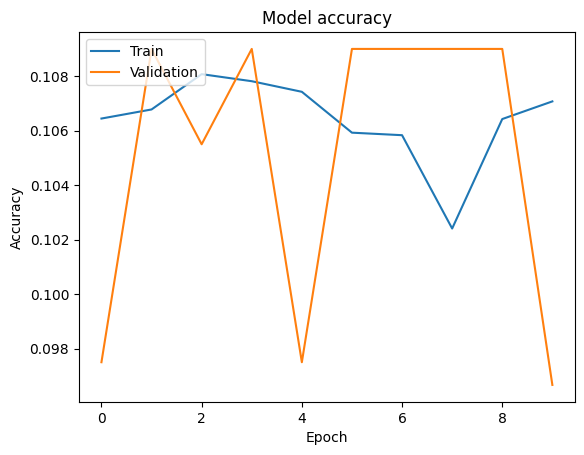

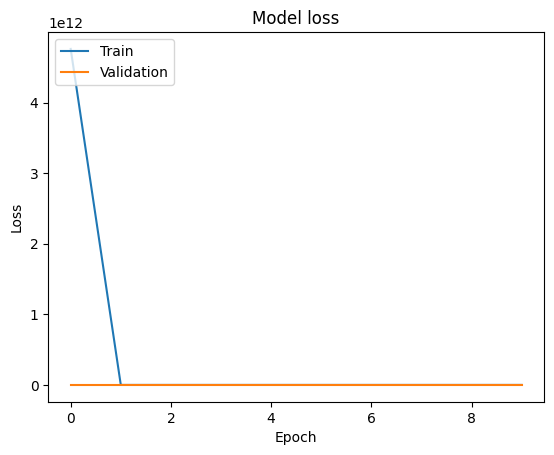

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
F1 Score: 0.017561901293024953
AUC Score: 0.5
------------------------------------------------------


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,934,282 (37.90 MB)

 Trainable params: 9,934,282 (37.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.1050 - loss: 582.0171 - val_accuracy: 0.1090 - val_loss: 2.3030
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 200ms/step - accuracy: 0.1144 - loss: 2.3012 - val_accuracy: 0.0982 - val_loss: 2.3028
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 201ms/step - accuracy: 0.1108 - loss: 2.3020 - val_accuracy: 0.1090 - val_loss: 2.3019
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 200ms/step - accuracy: 0.1134 - loss: 2.3015 - val_accuracy: 0.1090 - val_loss: 2.3024
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 200ms/step - accuracy: 0.1089 - loss: 2.3025 - val_accuracy: 0.1090 - val_loss: 2.3025
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 200ms/step - accuracy: 0.1113 - loss: 2.3020 - val_accuracy: 0.1090 - val_loss: 2.3025
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 201ms/step - accuracy: 0.1128 - loss: 2.3020 - val_accuracy: 0.1090 - val_loss: 2.3023
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 200ms/step - accuracy: 0.1135 - 

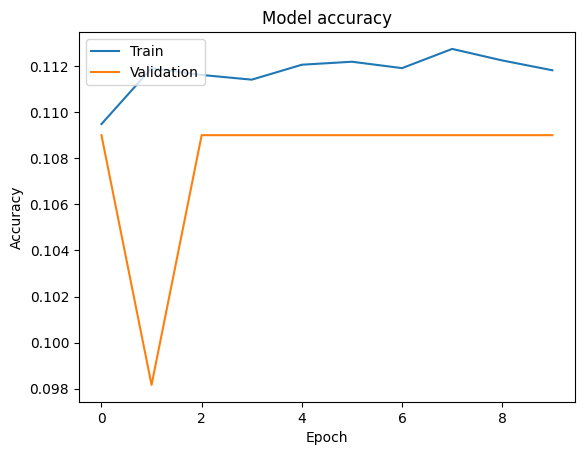

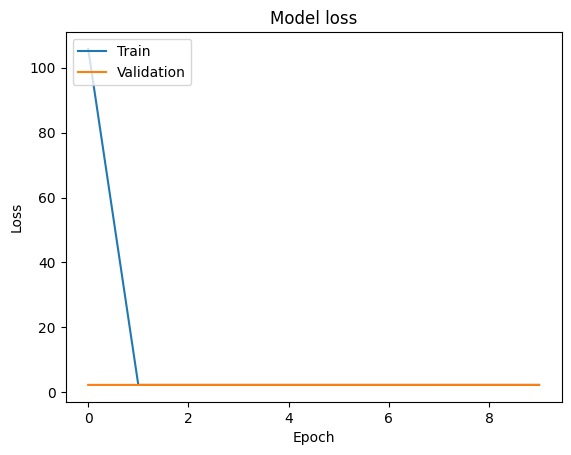

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
F1 Score: 0.023138302649304
AUC Score: 0.5
------------------------------------------------------


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,934,282 (37.90 MB)

 Trainable params: 9,934,282 (37.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 97s 218ms/step - accuracy: 0.5218 - loss: 1.2962 - val_accuracy: 0.9718 - val_loss: 0.0922
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 138s 212ms/step - accuracy: 0.9791 - loss: 0.0705 - val_accuracy: 0.9848 - val_loss: 0.0527
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 89s 211ms/step - accuracy: 0.9852 - loss: 0.0461 - val_accuracy: 0.9878 - val_loss: 0.0440
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 89s 211ms/step - accuracy: 0.9889 - loss: 0.0372 - val_accuracy: 0.9885 - val_loss: 0.0451
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 211ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.9873 - val_loss: 0.0393
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 211ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9897 - val_loss: 0.0342
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 211ms/step - accuracy: 0.9920 - loss: 0.0256 - val_accuracy: 0.9873 - val_loss: 0.0433
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 210ms/step - accuracy: 0.9940 - lo

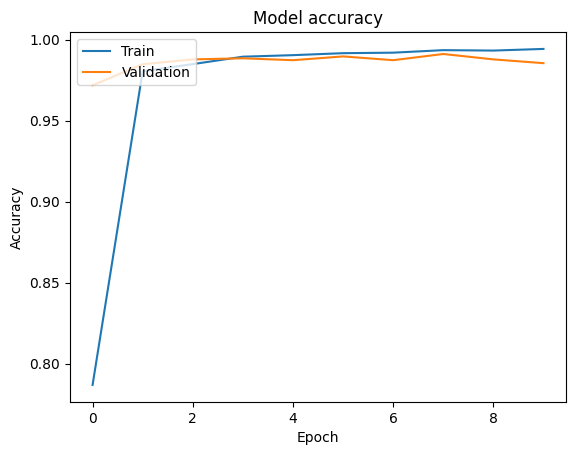

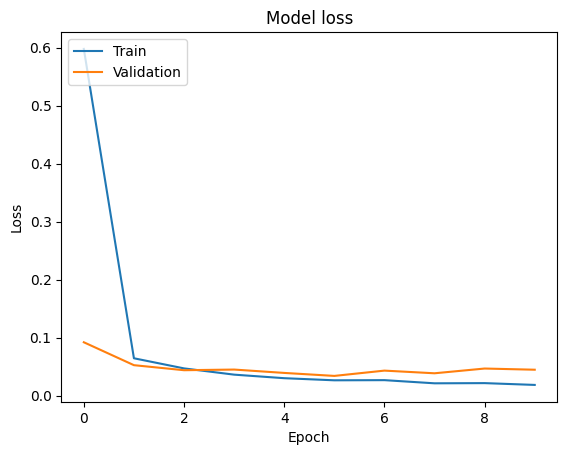

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
F1 Score: 0.9908022803189622
AUC Score: 0.9998906194156116
------------------------------------------------------


In [ ]:
list_of_vgg_models = [vgg_13_model_LR1, vgg_13_model_LR2, vgg_13_model_LR3]

for m in list_of_vgg_models:
  model, history, model_name = m()
  test_model(model, X_test, y_test, model_name)
  timestamp()
  loss_and_accuracy_plots(history)
  f1_auc_score(model, X_test)
  print("------------------------------------------------------")

# **ResNet Models**

In [ ]:
# Residual Block - 2 conv layers, 2 normalization layers, 2 activation layers
def residual_block(x, filters, kernel_size=3, strides=1):
    shortcut = x

    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(x) # Conv Layer 1
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1,1), padding='same')(x) # Conv Layer 1
    x = BatchNormalization()(x)

    # Adjusting shortcut for dimensions if necessary
    if strides != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut to the main path
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x

# resnet_model_LR1 Hyperparameters -
# Learning Rate (LR) - 0.1
def resnet_model_LR1():
    model_name = "resnet_model_LR1"

    inputs = layers.Input(shape=(28, 28, 1)) # Input layer

    x = Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same')(inputs) # Initial Conv Layer - 64 feature maps, 3*3 kernel size
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x) # Max Pooling Layer 1 - 2*2 pool size

    x = residual_block(x, filters=64) # Residual Block 1 - 64 Feature maps
    x = residual_block(x, filters=64) # Residual Block 2 - 64 Feature maps

    x = residual_block(x, filters=128, strides=2) # Residual Block 3 - 128 Feature maps, stride size - 2 for downsampling
    x = residual_block(x, filters=128) # Residual Block 4 - 128 Feature maps

    x = residual_block(x, filters=256, strides=2) # Residual Block 5 - 256 Feature maps, stride size - 2 for downsampling
    x = residual_block(x, filters=256) # Residual Block 6 - 256 Feature maps

    x = residual_block(x, filters=512, strides=2) # Residual Block 7 - 512 Feature maps, stride size - 2 for downsampling
    x = residual_block(x, filters=512) # Residual Block 8 - 512 Feature maps

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(units=10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.1),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name


# resnet_model_LR2 Hyperparameters -
# Learning Rate (LR) - 0.01
def resnet_model_LR2():
    model_name = "resnet_model_LR2"

    inputs = layers.Input(shape=(28, 28, 1)) # Input layer

    x = Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same')(inputs) # Initial Conv Layer - 64 feature maps, 3*3 kernel size
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x) # Max Pooling Layer 1 - 2*2 pool size

    x = residual_block(x, filters=64) # Residual Block 1 - 64 Feature maps
    x = residual_block(x, filters=64) # Residual Block 2 - 64 Feature maps

    x = residual_block(x, filters=128, strides=2) # Residual Block 3 - 128 Feature maps, stride size - 2 for downsampling
    x = residual_block(x, filters=128) # Residual Block 4 - 128 Feature maps

    x = residual_block(x, filters=256, strides=2) # Residual Block 5 - 256 Feature maps, stride size - 2 for downsampling
    x = residual_block(x, filters=256) # Residual Block 6 - 256 Feature maps

    x = residual_block(x, filters=512, strides=2) # Residual Block 7 - 512 Feature maps, stride size - 2 for downsampling
    x = residual_block(x, filters=512) # Residual Block 8 - 512 Feature maps

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(units=10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# resnet_model_LR3 Hyperparameters -
# Learning Rate (LR) - 0.001
def resnet_model_LR3():
    model_name = "resnet_model_LR3"

    inputs = layers.Input(shape=(28, 28, 1)) # Input layer

    x = Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same')(inputs) # Initial Conv Layer - 64 feature maps, 3*3 kernel size
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x) # Max Pooling Layer 1 - 2*2 pool size

    x = residual_block(x, filters=64) # Residual Block 1 - 64 Feature maps
    x = residual_block(x, filters=64) # Residual Block 2 - 64 Feature maps

    x = residual_block(x, filters=128, strides=2) # Residual Block 3 - 128 Feature maps, stride size - 2 for downsampling
    x = residual_block(x, filters=128) # Residual Block 4 - 128 Feature maps

    x = residual_block(x, filters=256, strides=2) # Residual Block 5 - 256 Feature maps, stride size - 2 for downsampling
    x = residual_block(x, filters=256) # Residual Block 6 - 256 Feature maps

    x = residual_block(x, filters=512, strides=2) # Residual Block 7 - 512 Feature maps, stride size - 2 for downsampling
    x = residual_block(x, filters=512) # Residual Block 8 - 512 Feature maps

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(units=10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

    return model, history, model_name

# **ResNet Models Training and Test**

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 28, 28, 64)     │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 28, 28, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 28, 28, 64)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 14, 14, 64)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 14, 14, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 14, 14, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 14, 14, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 14, 14, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 14, 14, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 14, 14, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 14, 14, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 11,187,210 (42.68 MB)

 Trainable params: 11,177,610 (42.64 MB)

 Non-trainable params: 9,600 (37.50 KB)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 69ms/step - accuracy: 0.5789 - loss: 2.0960 - val_accuracy: 0.7767 - val_loss: 0.9297
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9714 - loss: 0.0982 - val_accuracy: 0.9590 - val_loss: 0.1787
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9799 - loss: 0.0707 - val_accuracy: 0.9012 - val_loss: 0.4189
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9830 - loss: 0.0575 - val_accuracy: 0.9800 - val_loss: 0.0806
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9851 - loss: 0.0503 - val_accuracy: 0.9607 - val_loss: 0.1575
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9858 - loss: 0.0484 - val_accuracy: 0.9867 - val_loss: 0.0511
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9887 - loss: 0.0376 - val_accuracy: 0.9677 - val_loss: 0.1209
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9881 - loss: 0.0414 - 

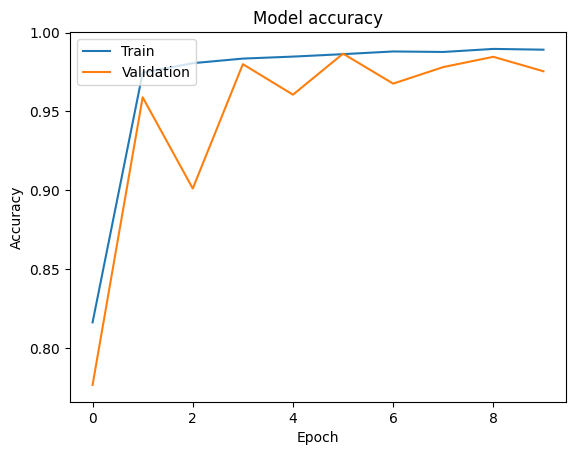

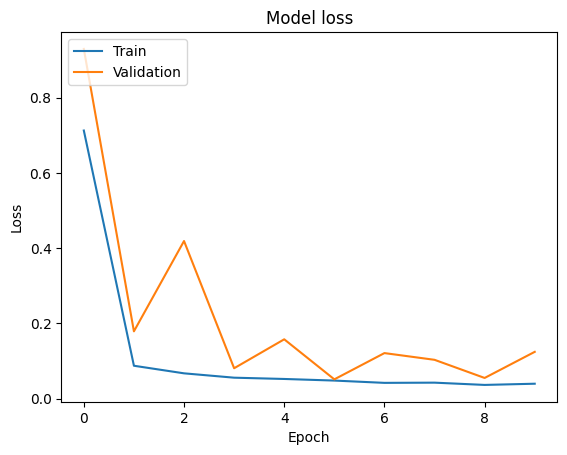

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
F1 Score: 0.9778416763538192
AUC Score: 0.999166194256025
------------------------------------------------------


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 28, 28, 64)     │            640 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 28, 28, 64)     │            256 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_17             │ (None, 28, 28, 64)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 14, 14, 64)     │              0 │ activation_17[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 14, 14, 64)     │            256 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_18             │ (None, 14, 14, 64)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ activation_18[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 14, 14, 64)     │            256 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 14, 14, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_19             │ (None, 14, 14, 64)     │              0 │ add_8[0][0]            │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ activation_19[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_23    │ (None, 14, 14, 64)     │            256 │ conv2d_23[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_20        

 Total params: 11,187,210 (42.68 MB)

 Trainable params: 11,177,610 (42.64 MB)

 Non-trainable params: 9,600 (37.50 KB)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.8603 - loss: 0.6186 - val_accuracy: 0.9537 - val_loss: 0.1575
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9826 - loss: 0.0553 - val_accuracy: 0.9267 - val_loss: 0.2569
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9870 - loss: 0.0431 - val_accuracy: 0.9735 - val_loss: 0.1042
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9914 - loss: 0.0288 - val_accuracy: 0.9802 - val_loss: 0.0728
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9914 - loss: 0.0278 - val_accuracy: 0.9795 - val_loss: 0.0826
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9927 - loss: 0.0225 - val_accuracy: 0.9678 - val_loss: 0.1478
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9934 - loss: 0.0227 - val_accuracy: 0.9718 - val_loss: 0.1164
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9941 - loss: 0.0202 - 

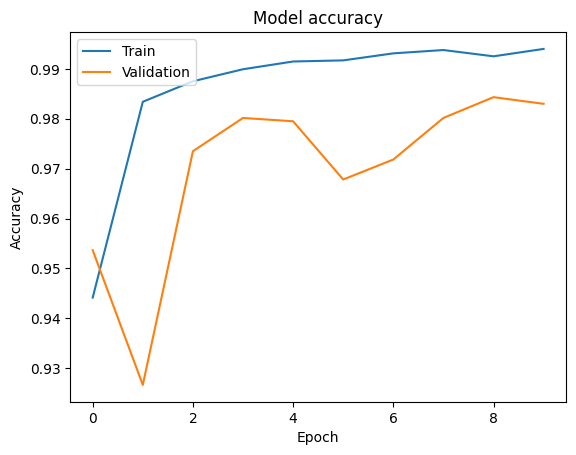

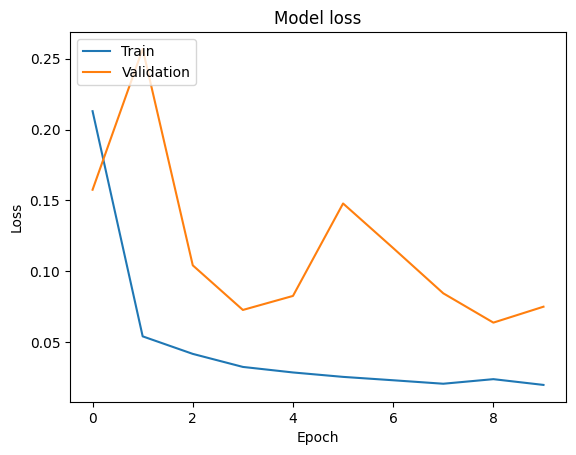

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
F1 Score: 0.9858912784139775
AUC Score: 0.9998505273020954
------------------------------------------------------


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_40 (Conv2D)        │ (None, 28, 28, 64)     │            640 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_40    │ (None, 28, 28, 64)     │            256 │ conv2d_40[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_34             │ (None, 28, 28, 64)     │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 14, 14, 64)     │              0 │ activation_34[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_41 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_41    │ (None, 14, 14, 64)     │            256 │ conv2d_41[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_35             │ (None, 14, 14, 64)     │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_42 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ activation_35[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_42    │ (None, 14, 14, 64)     │            256 │ conv2d_42[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_16 (Add)              │ (None, 14, 14, 64)     │              0 │ batch_normalization_4… │
│                           │                        │                │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_36             │ (None, 14, 14, 64)     │              0 │ add_16[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_43 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ activation_36[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_43    │ (None, 14, 14, 64)     │            256 │ conv2d_43[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_37        

 Total params: 11,187,210 (42.68 MB)

 Trainable params: 11,177,610 (42.64 MB)

 Non-trainable params: 9,600 (37.50 KB)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.9278 - loss: 0.2321 - val_accuracy: 0.8713 - val_loss: 0.3923
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.9853 - loss: 0.0472 - val_accuracy: 0.9897 - val_loss: 0.0371
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9703 - val_loss: 0.1140
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9922 - loss: 0.0240 - val_accuracy: 0.9860 - val_loss: 0.0520
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9878 - val_loss: 0.0493
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9947 - loss: 0.0183 - val_accuracy: 0.9903 - val_loss: 0.0348
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9950 - loss: 0.0156 - val_accuracy: 0.9898 - val_loss: 0.0413
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9954 - loss: 0.0147 - 

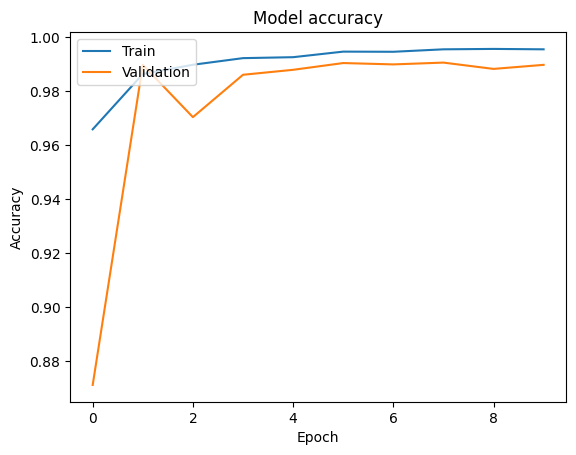

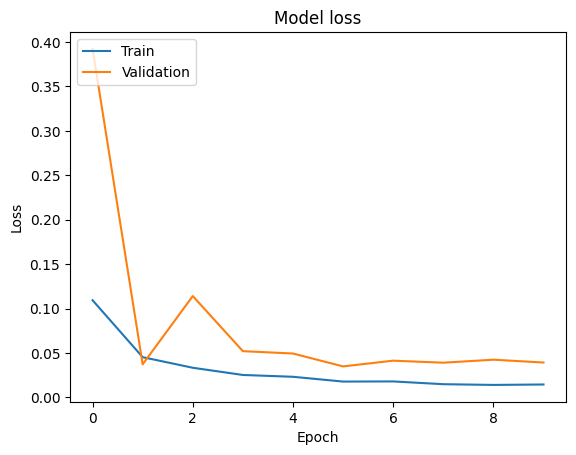

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
F1 Score: 0.9909952367747193
AUC Score: 0.9999399485485041
------------------------------------------------------


In [ ]:
list_of_resnet_models = [resnet_model_LR1, resnet_model_LR2, resnet_model_LR3 ]

for m in list_of_resnet_models:
  model, history, model_name = m()
  test_model(model, X_test, y_test, model_name)
  timestamp()
  loss_and_accuracy_plots(history)
  f1_auc_score(model, X_test)
  print("------------------------------------------------------")

# **Best Model's AUC-ROC Curve and Precision Recall Curve and First and Second Layer Feature Visualization**

In [3]:
# Best Model - CNN_12_24_32

# cnn_model_12_24_32 Hyperparameters -
# Conv Layer 1 - (12, (3,3)), BatchNormalization, Activation - relu,
# Conv Layer 2 - (24, (3,3), stride=(2,2)), BatchNormalization, Activation - relu,
# Conv Layer 3 - (32, (3,3), stride=(2,2)), BatchNormalization, Activation - relu,
# Flatten Layer, Dense Layer (200 neurons), BatchNormalization, Activation - relu,
# Dropout Layer, Output Layer (10 neurons)
# Adam Optimizer, Learning Rate - 0.001, epochs - 10, Batch Size - 128

model_name = "cnn_model_12_24_32"
model = Sequential()
model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=(1,1), padding='same')) # Conv Layer 1 - 12 feature maps, 3*3 kernel size, stride - 1, activation - relu
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=24, kernel_size=(6, 6), strides=(2,2), padding='same')) # Conv Layer 2 - 24 feature maps, 6*6 kernel size, stride - 2, activation - relu
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=32, kernel_size=(6, 6), strides=(2,2), padding='same')) # Conv Layer 3 - 32 feature maps, 6*6 kernel size, stride - 2, activation - relu
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(units=200)) # Dense Layer 1 - 200 neurons
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.4))
model.add(Dense(units=10, activation='softmax')) # Output Layer - 10 neurons
model.summary()
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 12)          │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 12)          │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 24)          │          10,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 14, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │          27,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         313,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,074 (1.35 MB)

 Trainable params: 354,538 (1.35 MB)

 Non-trainable params: 536 (2.09 KB)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8964 - loss: 0.3432 - val_accuracy: 0.9530 - val_loss: 0.1572
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0541 - val_accuracy: 0.9878 - val_loss: 0.0395
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9888 - loss: 0.0367 - val_accuracy: 0.9890 - val_loss: 0.0359
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9911 - loss: 0.0286 - val_accuracy: 0.9860 - val_loss: 0.0455
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9921 - loss: 0.0225 - val_accuracy: 0.9908 - val_loss: 0.0277
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9948 - loss: 0.0160 - val_accuracy: 0.9908 - val_loss: 0.0296
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.9895 - val_loss: 0.0353
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9955 - loss: 0.0141 - val_accuracy: 

In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9886 - loss: 0.0390


In [14]:
# Model Weights and Biases
# Iterating through all layers in the model
for layer in model.layers:
    weights = layer.get_weights()  # Retrieving the weights of the layer
    if weights:  # Checking to see if the layer has weights
        print(f"Layer: {layer.name}")

        # Rounding weights and biases to 3 decimal places
        rounded_weights = np.round(weights[0], 3)
        rounded_biases = np.round(weights[1], 3)
        # Printing rounded weights and biases
        print(f"Rounded Weights: {rounded_weights}")
        print(f"Rounded Biases: {rounded_biases}\n")

Layer: conv2d
Rounded Weights: [[[[ 0.074 -0.075 -0.131 -0.168  0.074 -0.2   -0.027 -0.121  0.166
    -0.088  0.022  0.215]]

  [[-0.084  0.089 -0.162 -0.154 -0.06  -0.116 -0.125  0.202  0.188
    -0.175 -0.044  0.04 ]]

  [[ 0.035  0.202 -0.132  0.127  0.174 -0.224  0.022  0.251 -0.082
    -0.117 -0.18  -0.089]]]


 [[[ 0.006 -0.097 -0.119 -0.151  0.072 -0.108 -0.027 -0.029 -0.179
    -0.182  0.075  0.212]]

  [[ 0.241  0.206  0.023  0.242 -0.187  0.079 -0.075 -0.061  0.106
    -0.102  0.141  0.1  ]]

  [[ 0.098 -0.109  0.012  0.061  0.004 -0.056 -0.171 -0.045  0.079
    -0.163  0.188 -0.23 ]]]


 [[[ 0.135  0.091  0.166  0.147  0.176  0.151  0.057 -0.087 -0.226
     0.03   0.046 -0.168]]

  [[-0.187 -0.037  0.226 -0.072 -0.244 -0.045  0.102 -0.214 -0.027
    -0.168 -0.001 -0.187]]

  [[-0.154 -0.046  0.108  0.076 -0.021  0.165  0.056  0.085 -0.023
    -0.143  0.202 -0.144]]]]
Rounded Biases: [ 0.002 -0.     0.006  0.009  0.005 -0.017 -0.01  -0.009 -0.009  0.006
  0.002 -0.01 ]

Layer

In [15]:
# Creating a file to store the best model weights
with open('Best_CNN_Model_weights.txt', 'w') as f:
    for layer in model.layers:
        weights = layer.get_weights()
        if weights:
            f.write(f"Layer: {layer.name}\n")

            # Rounding weights and biases to 3 decimal places
            rounded_weights = np.round(weights[0], 3)
            rounded_biases = np.round(weights[1], 3)

            f.write(f"Rounded Weights: {rounded_weights}\n")
            f.write(f"Rounded Biases: {rounded_biases}\n\n")

print("Weights exported to 'Best_CNN_Model_weights.txt'")


Weights exported to 'Best_CNN_Model_weights.txt'


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


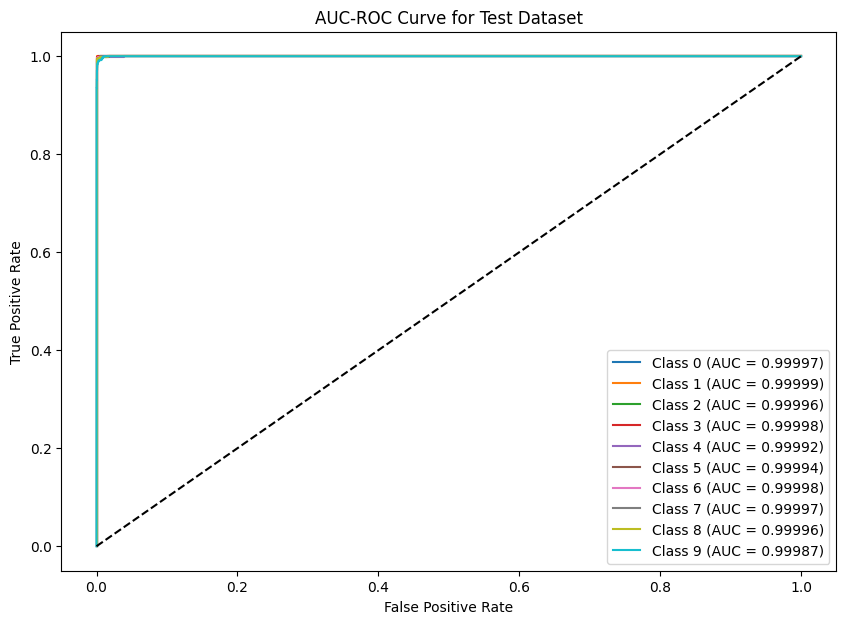

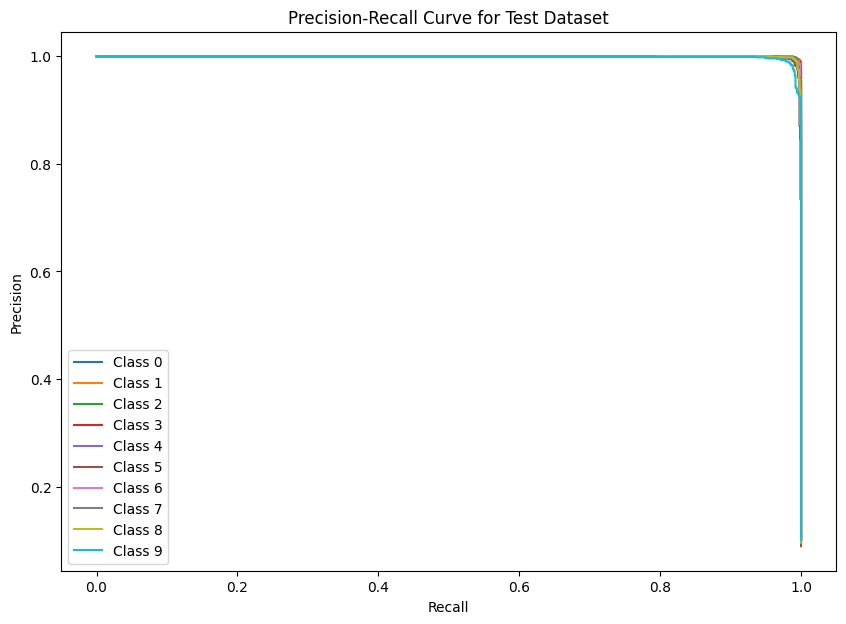

In [5]:
#AUC-ROC Curve
# Predicting probabilities for the test set
y_prediction = model.predict(X_test)

# Computing the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = y_test.shape[1]

# Calculating ROC curve and AUC for each class
for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Test Dataset')
plt.legend(loc='best')
plt.show()

# Precision Recall Curve
# Computing precision-recall for each class
precision = dict()
recall = dict()
for i in range(classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_prediction[:, i])

# Plotting the precision-recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(classes):
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Test Dataset')
plt.legend(loc='best')
plt.show()


In [8]:
# Taking a sample image from test set and reshaping it to match the dimwnsion of the layers
image = X_test[6]
image = np.expand_dims(image, axis=0)

print(image.shape)

# Con2D Layer 1 visualization
firstLayer = Model(inputs=model.inputs, outputs=model.layers[1].output)
featureMap_layer1 = firstLayer.predict(image)

# Con2D Layer 2 visualization
secondLayer = Model(inputs=model.inputs, outputs=model.layers[4].output)
featureMap_layer2 = secondLayer.predict(image)

(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


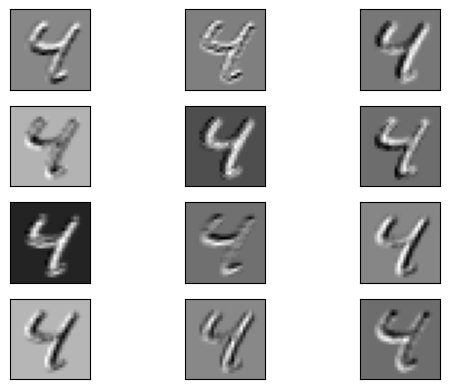

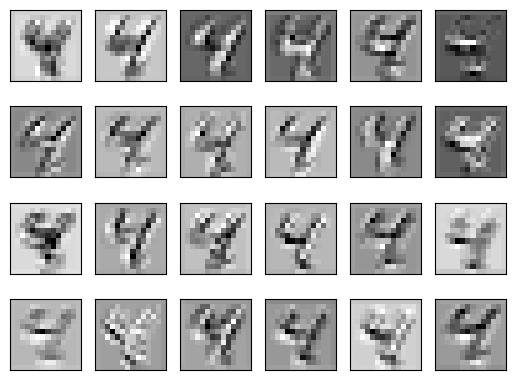

In [11]:
# Plotting for Conv2D Layer 1
n_rows = 4
n_cols = 3
ix = 1
for _ in range(n_rows):
    for _ in range(n_cols):
        ax = plt.subplot(n_rows, n_cols, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(featureMap_layer1[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.show()

# Plotting for Conv2D Layer 2
n_rows = 4
n_cols = 6
ix = 1
for _ in range(n_rows):
    for _ in range(n_cols):
        ax = plt.subplot(n_rows, n_cols, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(featureMap_layer2[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.show()